In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
cwd = os.getcwd()
print(cwd)

%matplotlib inline 

C:\Users\Lyokoheros\KCK\RecaptchaSolver\RecaptchaSolver


In [6]:
#przygotowanie danych
#ścieżka="/media/student/UBUNTU 18_0/KCK/"
ścieżka="C:\\Users\\macie\\KCK\\RecaptchaSolver\\dane"

PATH = os.path.join(os.path.dirname(ścieżka), 'dane')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


train_zebra_dir = os.path.join(train_dir, 'zebra')  
train_sygnalizacja_dir = os.path.join(train_dir, 'sygnalizacja')
train_auto_dir = os.path.join(train_dir, 'auto')
#train_inne_dir = os.path.join(train_dir, 'inne')

validation_zebra_dir = os.path.join(validation_dir, 'zebra')  
validation_sygnalizacja_dir = os.path.join(validation_dir, 'sygnalizacja')
validation_auto_dir = os.path.join(validation_dir, 'auto')
#validation_inne_dir = os.path.join(validation_dir, 'inne')


num_zebra_tr = len(os.listdir(train_zebra_dir))
num_sygnalizacja_tr = len(os.listdir(train_sygnalizacja_dir))
num_auto_tr = len(os.listdir(train_auto_dir))
#num_inne_tr = len(os.listdir(train_inne_dir))

num_zebra_val = len(os.listdir(validation_zebra_dir))
num_sygnalizacja_val = len(os.listdir(validation_sygnalizacja_dir))
num_auto_val = len(os.listdir(validation_auto_dir))
#num_inne_val = len(os.listdir(validation_inne_dir))

total_train = num_zebra_tr + num_sygnalizacja_tr + num_auto_tr #+ num_inne_tr
total_val = num_zebra_val + num_sygnalizacja_val + num_auto_val #+ num_inne_val

print('zebra trainings:', num_zebra_tr)
print('sygnalizacja training:', num_sygnalizacja_tr)
print('auto training:', num_auto_tr)
#print('inne training:', num_inne_tr)

print('zebra validation:', num_zebra_val)
print('sygnalizacja validation:', num_sygnalizacja_val)
print('auto validation:', num_auto_val)
#print('inne validation:', num_inne_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


batch_size = 8
epochs = 15
IMG_HEIGHT = 128
IMG_WIDTH = 128




train_image_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255)
 
validation_image_generator = ImageDataGenerator(rescale=1./255)



train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')





zebra trainings: 96
sygnalizacja training: 97
auto training: 96
zebra validation: 26
sygnalizacja validation: 27
auto validation: 43
--
Total training images: 289
Total validation images: 96
Found 385 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


D:\Programy\Kompilatory\Python\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
D:\Programy\Kompilatory\Python\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


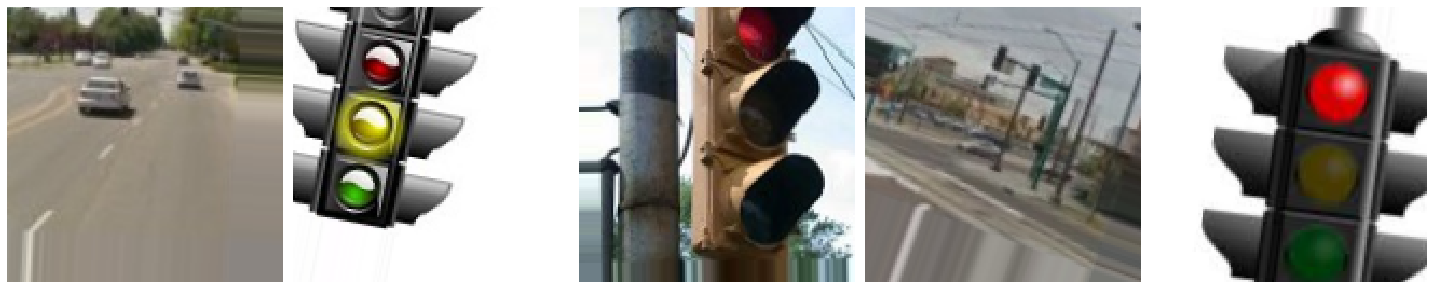

In [7]:
#test danych
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes) :
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(sample_training_images[:5])

In [3]:
#przygotowanie modelu sieci

#model = Sequential([
#    Conv2D(1024, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#    MaxPooling2D(),
#    Conv2D(256, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Conv2D(512, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Flatten(),
#    Dense(64, activation='relu'),
#    Dense(1, activation='sigmoid')
#])

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [4]:
#trenowanie

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
36/36 [==============================] - 20s 549ms/step - loss: -7.7508 - accuracy: 0.2639 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 2/15
36/36 [==============================] - 19s 523ms/step - loss: -6.8726 - accuracy: 0.2313 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 3/15
36/36 [==============================] - 19s 524ms/step - loss: -7.1923 - accuracy: 0.2491 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 4/15
36/36 [==============================] - 18s 514ms/step - loss: -8.8868 - accuracy: 0.2527 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 5/15
36/36 [==============================] - 18s 511ms/step - loss: -7.0277 - accuracy: 0.2361 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 6/15
36/36 [==============================] - 18s 504ms/step - loss: -8.9504 - accuracy: 0.2527 - val_loss: -3.8333 - val_accuracy: 0.2604
Epoch 7/15
36/36 [==============================] - 18s 506ms/step - loss: -5.6513 - accuracy: 0.2555 - val_loss: -3.8333 - val_ac

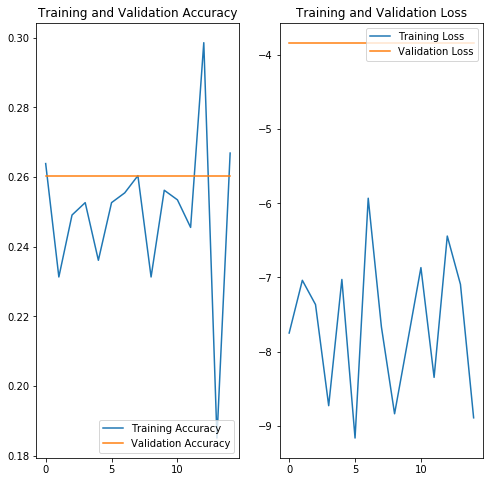

In [5]:
#Podsumowanie wyników

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()